In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.shape

(8790, 10)

### Dropping Useless Colunms

In [4]:
df.drop(columns = ['show_id'], inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Changing Column names for better understanding

In [5]:
df.rename(columns = {
    'type': 'Content_Type',
    'title': 'Content_Name',
    'director': 'Director_Name',
    'country': 'Origin_Country',
    'date_added': 'Added_Date',
    'release_year': 'Release_Year',
    'rating': 'Age_Rating',
    'duration': 'Run_Time',
    'listed_in': 'Genre'
}, inplace=True)

df.head()

,Content_Type,Content_Name,Director_Name,Origin_Country,Added_Date,Release_Year,Age_Rating,Run_Time,Genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Checking for Duplicate Values

In [6]:
print(f'Number of Duplicate Values in the Dataset: {df.duplicated().sum()}')

Number of Duplicate Values in the Dataset: 3


### Checking for Null Values

In [7]:
print(f'Number of Null Values in the Dataset:\n{df.isna().sum()}')

Number of Null Values in the Dataset:
Content_Type      0
Content_Name      0
Director_Name     0
Origin_Country    0
Added_Date        0
Release_Year      0
Age_Rating        0
Run_Time          0
Genre             0
dtype: int64


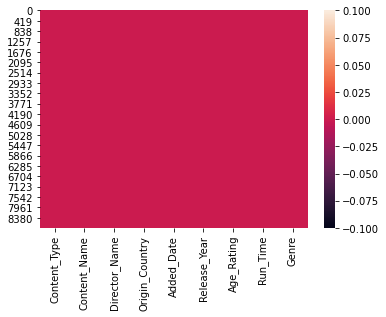

In [8]:
sns.heatmap(df.isna());

### Checking Data Types of the Columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content_Type    8790 non-null   object
 1   Content_Name    8790 non-null   object
 2   Director_Name   8790 non-null   object
 3   Origin_Country  8790 non-null   object
 4   Added_Date      8790 non-null   object
 5   Release_Year    8790 non-null   int64 
 6   Age_Rating      8790 non-null   object
 7   Run_Time        8790 non-null   object
 8   Genre           8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [10]:
df.describe()

,Release_Year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.columns

Index(['Content_Type', 'Content_Name', 'Director_Name', 'Origin_Country',
       'Added_Date', 'Release_Year', 'Age_Rating', 'Run_Time', 'Genre'],
      dtype='object')

### Changing Data Types of required Columns

In [12]:
df['Added_Date'] = pd.to_datetime(df['Added_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Content_Type    8790 non-null   object        
 1   Content_Name    8790 non-null   object        
 2   Director_Name   8790 non-null   object        
 3   Origin_Country  8790 non-null   object        
 4   Added_Date      8790 non-null   datetime64[ns]
 5   Release_Year    8790 non-null   int64         
 6   Age_Rating      8790 non-null   object        
 7   Run_Time        8790 non-null   object        
 8   Genre           8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 618.2+ KB


# Data Analysis

### Content Types on Netflix

In [13]:
data1 = df['Content_Type'].value_counts()
data1

Content_Type
Movie      6126
TV Show    2664
Name: count, dtype: int64

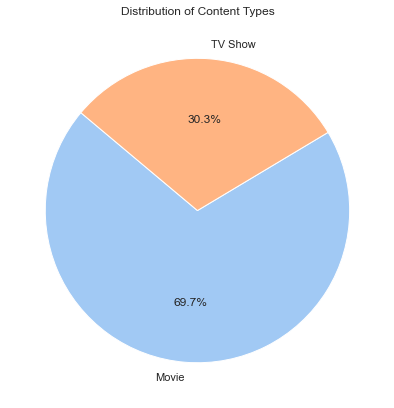

In [14]:
sns.set_theme()
plt.figure(figsize=(7, 7))
plt.pie(data1, labels=data1.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Content Types')
plt.show()

### Top-10 countries with most content on Netflix along with the Content Types

In [15]:
data2 = df.groupby(['Origin_Country', 'Content_Type']).size().unstack(fill_value=0)
total = data2.sum(axis=1)
total

Origin_Country
Argentina        76
Australia       114
Austria           9
Bangladesh        3
Belarus           1
               ... 
Uruguay           9
Venezuela         2
Vietnam           7
West Germany      1
Zimbabwe          1
Length: 86, dtype: int64

In [16]:
countries_top10 = total.sort_values(ascending=False).head(10)
countries_top10

Origin_Country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
dtype: int64

In [17]:
data2

Content_Type,Movie,TV Show
Origin_Country,,
Argentina,56,20
Australia,61,53
Austria,8,1
Bangladesh,3,0
Belarus,0,1
...,...,...
Uruguay,8,1
Venezuela,2,0
Vietnam,7,0


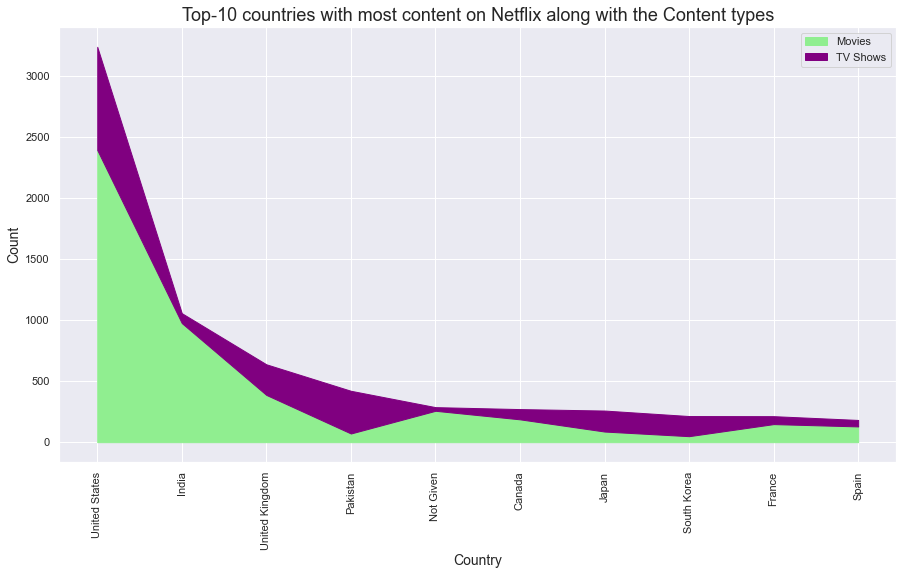

In [18]:
plt.figure(figsize=(15, 8))

# Data for Movies and TV Shows for the top 10 countries
countries = countries_top10.index
movies = data2.loc[countries, 'Movie']
tv_shows = data2.loc[countries, 'TV Show']

# Cumulative values for stacking the areas
cumulative_movies = movies
cumulative_tv_shows = movies + tv_shows

# Stacked area plot
plt.fill_between(countries, cumulative_movies, color='lightgreen', label='Movies')  
plt.fill_between(countries, cumulative_tv_shows, cumulative_movies, color='purple', label='TV Shows')  

# Metadata for the plot
plt.xticks(rotation='vertical')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top-10 countries with most content on Netflix along with the Content types', fontsize=18)
plt.legend()

# Display the plot
plt.show()


### Different Age Ratings Content on Netflix

In [19]:
df["Age_Rating"].value_counts()

Age_Rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

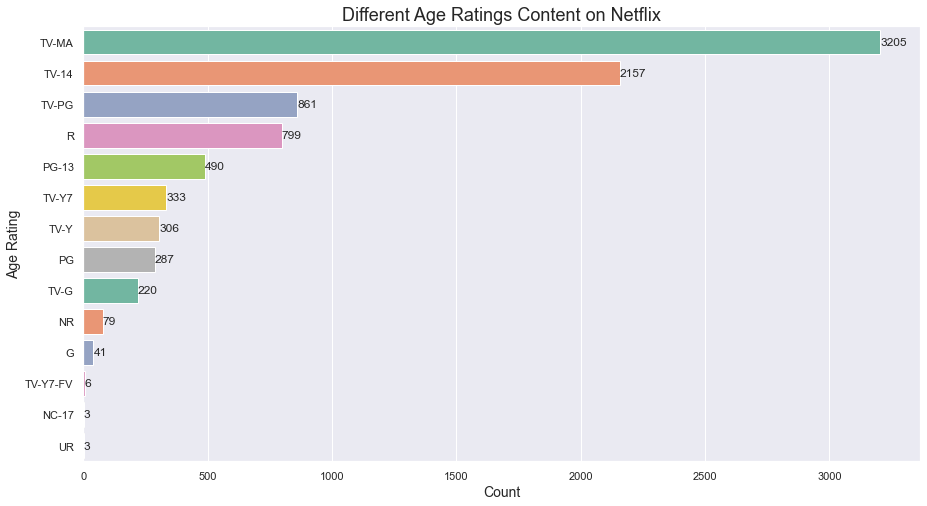

In [20]:
# Rating counts and sorting them
rating_counts = df['Age_Rating'].value_counts().sort_values(ascending=False)

# bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="Set2")

# Metadata for the plot
plt.title('Different Age Ratings Content on Netflix', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Rating', fontsize=14)

# Annotate the bars with values
for index, value in enumerate(rating_counts.values):
    plt.text(value, index, f'{value}', va='center')

# Display the plot
plt.show()

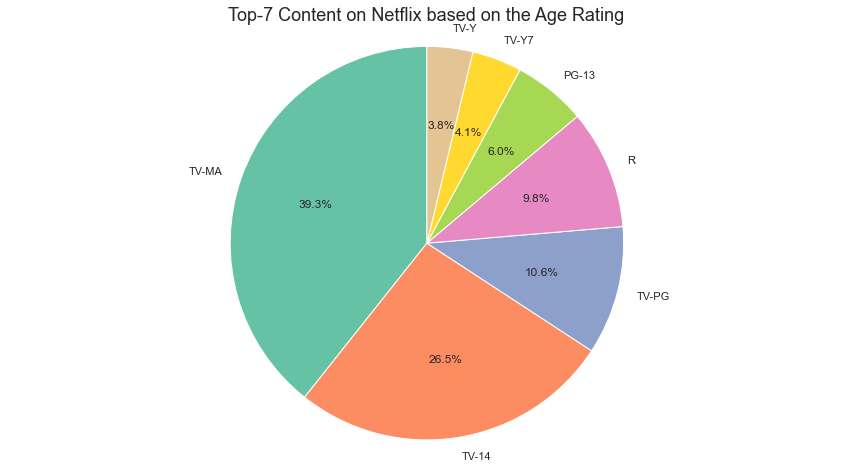

In [21]:
# Rating counts
rating_counts = df['Age_Rating'].value_counts().head(7)

# pie chart
plt.figure(figsize=(15, 8))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

# title
plt.title('Top-7 Content on Netflix based on the Age Rating', fontsize=18)
plt.axis('equal')
plt.show()

### Top-10 directors on Netflix

In [22]:
given_name = df['Director_Name'].value_counts().sort_values(ascending=False).iloc[1:11]
given_name

Director_Name
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Name: count, dtype: int64

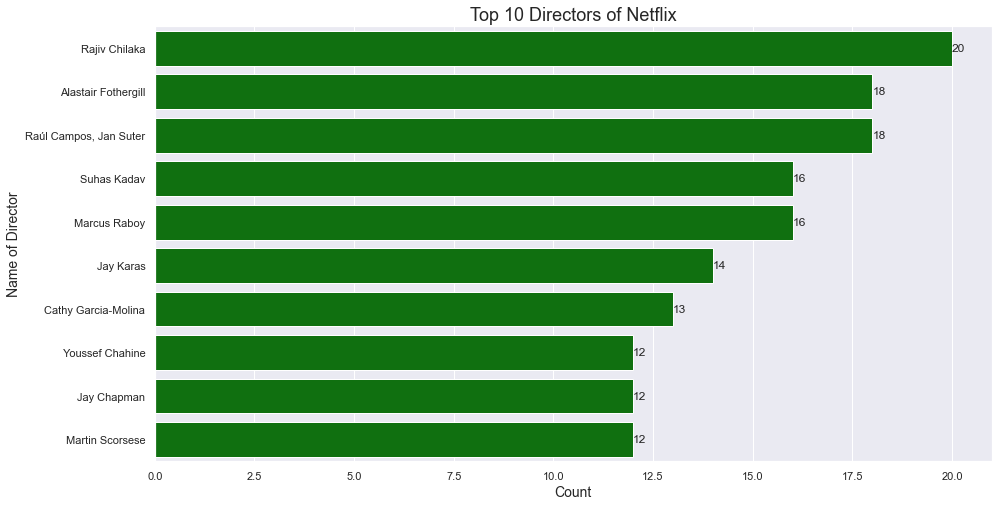

In [23]:
# bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=given_name.values, y=given_name.index, palette=["green"])

# Metadata
plt.xlabel('Count', fontsize=14)
plt.ylabel('Name of Director', fontsize=14)
plt.title('Top 10 Directors of Netflix', fontsize=18)

# Annotate the bars with values
for index, value in enumerate(given_name.values):
    plt.text(value, index, f'{value}', va='center')

# Display the plot
plt.show()

### Netflix Content by Release Year

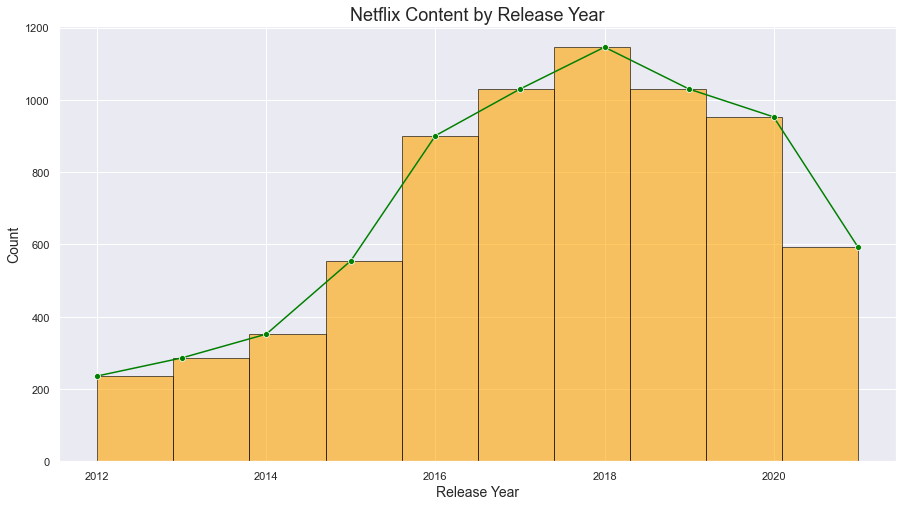

In [24]:
# Data for the top 10 release years
release_year_counts = df['Release_Year'].value_counts().head(10)

# Create a figure and axis
plt.figure(figsize=(15, 8))

# Plot the histogram
plt.hist(release_year_counts.index, bins=len(release_year_counts), weights=release_year_counts.values, color='orange', alpha=0.6, edgecolor='black')

# Plot the line plot on top of the histogram
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, marker='o', color='green')

# Add labels and title
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Netflix Content by Release Year', fontsize=18)

# Display the plot
plt.show()

#### Movies by Release Year

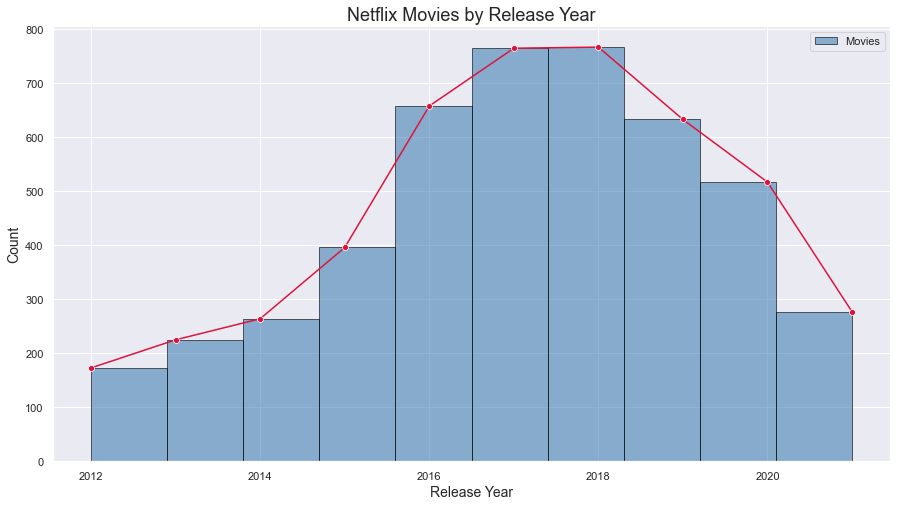

In [25]:
# Data for the top 10 release years for Movies
movies_release_years = df[df['Content_Type'] == 'Movie']['Release_Year'].value_counts().head(10)

plt.figure(figsize=(15, 8))

# histogram
plt.hist(movies_release_years.index, bins=len(movies_release_years), weights=movies_release_years.values, color='#4682B4', alpha=0.6, edgecolor='black', label='Movies')

# line plot 
sns.lineplot(x=movies_release_years.index, y=movies_release_years.values, marker='o', color='#DC143C')

# MetaData
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Netflix Movies by Release Year', fontsize=18)
plt.legend(loc='upper right')
plt.show()

#### TV Shows by Release Year

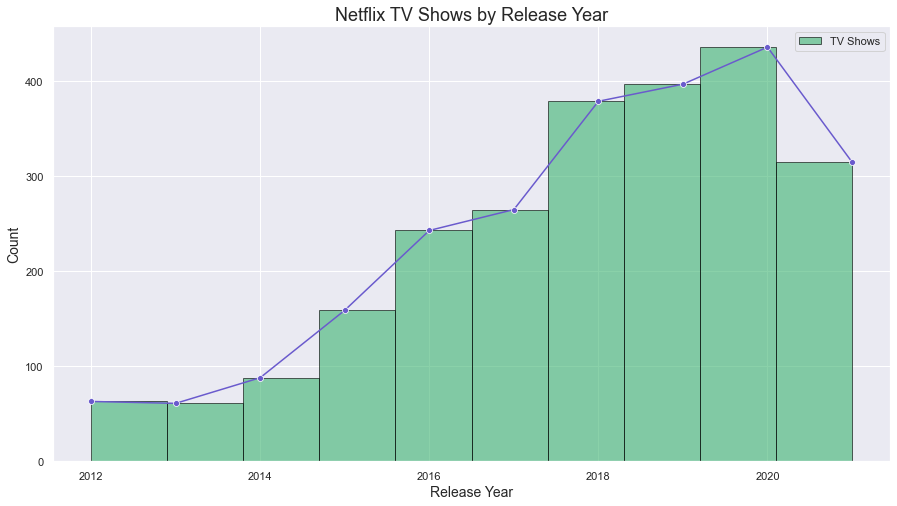

In [26]:
# Data for the top 10 release years for TV Shows
tv_shows_release_years = df[df['Content_Type'] == 'TV Show']['Release_Year'].value_counts().head(10)

plt.figure(figsize=(15, 8))

# histogram
plt.hist(tv_shows_release_years.index, bins=len(tv_shows_release_years), weights=tv_shows_release_years.values, color='#3CB371', alpha=0.6, edgecolor='black', label='TV Shows')

# line plot 
sns.lineplot(x=tv_shows_release_years.index, y=tv_shows_release_years.values, marker='o', color='#6A5ACD')

# MetaData
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Netflix TV Shows by Release Year', fontsize=18)
plt.legend(loc='upper right')
plt.show()

### Top 7 Genres on Netflix based on both Movies and TV Shows

In [27]:
data4 = df.groupby(['Content_Type'])
data4['Genre'].value_counts()

Content_Type  Genre                                                    
Movie         Dramas, International Movies                                 362
              Documentaries                                                359
              Stand-Up Comedy                                              334
              Comedies, Dramas, International Movies                       274
              Dramas, Independent Movies, International Movies             252
                                                                          ... 
TV Show       Docuseries, Science & Nature TV, TV Dramas                     1
              Docuseries, TV Sci-Fi & Fantasy                                1
              International TV Shows, Kids' TV, TV Mysteries                 1
              International TV Shows, Korean TV Shows, TV Horror             1
              International TV Shows, Reality TV, TV Action & Adventure      1
Name: count, Length: 513, dtype: int64

#### Movie Genres

In [28]:
top7_movies_genre = data4['Genre'].value_counts().loc['Movie'].head(7)
top7_movies_genre

Genre
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Name: count, dtype: int64

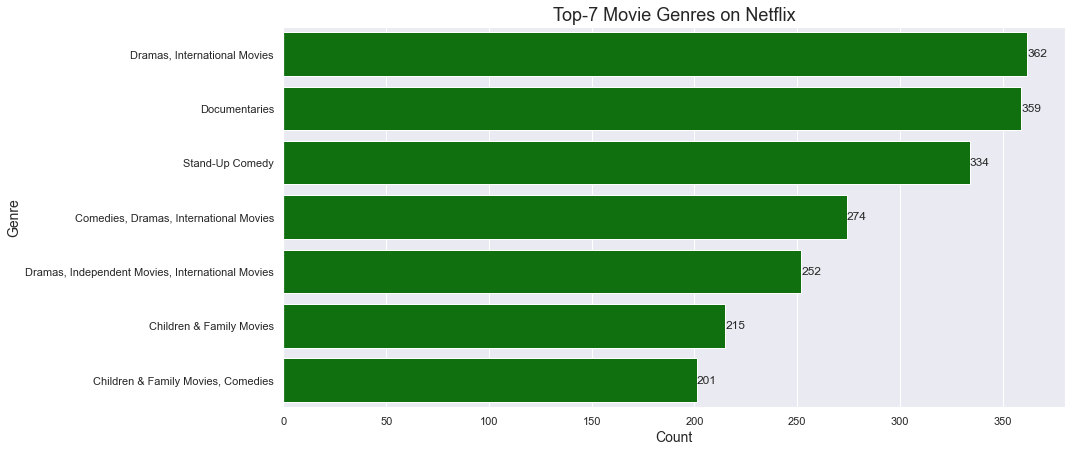

In [29]:
# bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top7_movies_genre.values, y=top7_movies_genre.index, palette=["green"])

# Metadata
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Top-7 Movie Genres on Netflix', fontsize=18)

# Annotate the bars with values
for index, value in enumerate(top7_movies_genre.values):
    plt.text(value, index, f'{value}', va='center')

# Display the plot
plt.show()

#### TV Show Genres

In [30]:
top7_tvshows_genre = data4['Genre'].value_counts().loc['TV Show'].head(7)
top7_tvshows_genre

Genre
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Name: count, dtype: int64

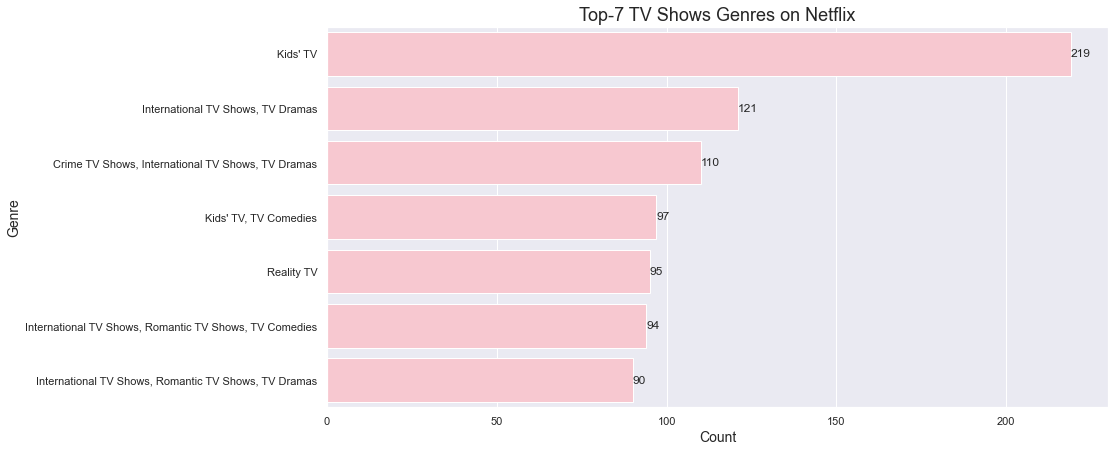

In [31]:
# bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top7_tvshows_genre.values, y=top7_tvshows_genre.index, palette=["pink"])

# Metadata
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Top-7 TV Shows Genres on Netflix', fontsize=18)

# Annotate the bars with values
for index, value in enumerate(top7_tvshows_genre.values):
    plt.text(value, index, f'{value}', va='center')

# Display the plot
plt.show()